In [62]:
!pip install pandas
!pip install matplolib

ERROR: Could not find a version that satisfies the requirement matplolib (from versions: none)
ERROR: No matching distribution found for matplolib

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [385]:
import pandas as pd
import matplotlib.pyplot as plt

In [386]:
details = pd.read_csv('./desafio_details.csv', encoding='latin-1', sep=';', skipinitialspace = True)
ratings = pd.read_csv('./desafio_ratings.csv', encoding='latin-1', sep=';', skipinitialspace = True)
#skipinitialspace = True -> para retirar espaços em branco

### 0. Procurando e retirando linhas nulas

In [468]:
details_ratings = pd.merge(details, ratings, on='hotel_id', how='inner')
details_ratings.dropna(how='all')
details_ratings.shape

(1291, 20)

In [469]:
#dr2 = details_ratings[details_ratings['hotel_name_y'].str.contains('excluir')]
details_ratings.drop([26, 54, 57, 463, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650], inplace=True)
details_ratings.head(30)

,Unnamed: 0_x,hotel_id,room_id,hotel_name_x,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities,Unnamed: 0_y,hotel_name_y,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings
0,2,10966118,1096611801,Casa em lindo cond. a 5min da praia PEV105,Ubatuba,holiday_home,Casa de 3 Quartos,220.00,"['Taças de vinho', 'Cozinha', 'Vaso sanitário'...",2,Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,5,10959776,1095977602,Apartamentos no Jardim Goiás Goiânia/GO - THO,Goiânia,apartment,Apartamento,48.00,"['Banheiro privativo', 'Secador de cabelo', 'S...",5,Apartamentos no Jardim Goiás Goiânia/GO - THO,https://www.booking.com/hotel/br/apartamentos-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,6,10949139,1094913902,Casa triplex em condomínio Floripa-SC ALI024,Florianópolis,holiday_home,Casa de Temporada,170.00,"['Área de estar', 'Toalete adicional', 'Utensí...",6,Casa triplex em condomínio Floripa-SC ALI024,https://www.booking.com/hotel/br/casa-triplex-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,10948439,1094843901,Apto com piscina no centro de Floripa PCE0406,Florianópolis,apartment,Apartamento de 1 Quarto,32.00,"['Acessível por elevador', 'Chuveiro', 'Mesa d...",9,Apto com piscina no centro de Floripa PCE0406,https://www.booking.com/hotel/br/apto-com-pisc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,10,10943450,1094345002,Apto espaçoso na beira do lago em Ilhéus ARS0169,Ilhéus,holiday_home,Casa de 3 Quartos,134.74,"['Fogão', 'Guarda-roupa ou armário', 'Toalhas'...",10,Apto espaçoso na beira do lago em Ilhéus ARS0169,https://www.booking.com/hotel/br/apto-espacoso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,12,10936844,1093684402,Apto térreo com churrasqueira Ubatuba-SP NXI001,Ubatuba,apartment,Apartamento,35.00,"['Banheiro privativo', 'Guarda-roupa ou armári...",12,Apto térreo com churrasqueira Ubatuba-SP NXI001,https://www.booking.com/hotel/br/apto-terreo-c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,13,10936145,1093614501,SPJ's - Jurerê Spot,Florianópolis,apartment,Apartamento de 1 Quarto,20.00,[],13,SPJ's - Jurerê Spot,https://www.booking.com/hotel/br/spjs-jurere-s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,14,10936145,1093614502,SPJ's - Jurerê Spot,Florianópolis,apartment,Apartamento,20.00,[],13,SPJ's - Jurerê Spot,https://www.booking.com/hotel/br/spjs-jurere-s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,15,10936145,1093614503,SPJ's - Jurerê Spot,Florianópolis,apartment,Apartamento,20.00,"['Internet', 'Travesseiro comum', 'Chuveiro', ...",13,SPJ's - Jurerê Spot,https://www.booking.com/hotel/br/spjs-jurere-s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,16,10936145,1093614504,SPJ's - Jurerê Spot,Florianópolis,apartment,Apartamento,20.00,"['Banheiro privativo', 'Vista do mar', 'Papel ...",13,SPJ's - Jurerê Spot,https://www.booking.com/hotel/br/spjs-jurere-s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## 1. Ordenação das cidades crescente em número de listings

In [470]:
details_ratings["city_name"]

0             Ubatuba
1             Goiânia
2       Florianópolis
3       Florianópolis
4              Ilhéus
            ...      
1286        Bombinhas
1287        Bombinhas
1288        Bombinhas
1289        Bombinhas
1290        Bombinhas
Name: city_name, Length: 1273, dtype: object

## 2. Ordenação das cidades decrescente em metros quadrados

In [471]:
cidades_decrescente_m2 = details.sort_values("room_surface_in_m2", ascending=False)
cidades_decrescente_m2[["city_name", "room_surface_in_m2"]]

,city_name,room_surface_in_m2
795,Florianópolis,550.0
407,Florianópolis,520.0
448,Florianópolis,502.0
117,Porto Seguro,463.0
494,Florianópolis,400.0
...,...,...
1254,Florianópolis,NaN
1255,Florianópolis,NaN
1259,Florianópolis,NaN
1270,Florianópolis,NaN


## 3. Cidades que tem mais avaliações

In [472]:
details_ratings["mean"] = (details_ratings["Comodidades"] + details_ratings["Limpeza"] + details_ratings["Conforto"] + details_ratings["Custo-benefício"] + details_ratings["Localização"] + details_ratings["Total"] + details_ratings["WiFi gratuito"]) / 7
maior_avaliacao = details_ratings.sort_values("number_of_ratings", ascending=False)
maior_avaliacao[['city_name', 'number_of_ratings']].head()

,city_name,number_of_ratings
1141,Florianópolis,633
1149,Florianópolis,633
1151,Florianópolis,633
1152,Florianópolis,633
1131,Florianópolis,633


## 4. Cidade com maior e cidade com menor média de avaliação

### 4.1           Maior médias de avaliação

In [474]:
cidade_maior_media = details_ratings[details_ratings["mean"] == details_ratings["mean"].max()]
cidade_maior_media[["city_name", "mean"]]

,city_name,mean
844,Florianópolis,9.8


### 4.1.1 Por que está cidade teve a maior média de avaliação?

In [475]:
cidade_maior_media[["city_name", "Total", "hotel_name_x", "Comodidades", "Limpeza", "Conforto", "Custo-benefício", "Localização","WiFi gratuito"]]

,city_name,Total,hotel_name_x,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,WiFi gratuito
844,Florianópolis,9.2,Studio excelente localização próx a UFSC BDM303,10.0,9.7,9.7,10.0,10.0,10.0


### O motivo da maior média é que na junção dos benefícios a experiência acaba se tornando completa.

### 4.2 Menores médias de avaliação

In [477]:
cidade_menor_media = details_ratings[details_ratings["mean"] == details_ratings["mean"].min()]
cidade_menor_media[["city_name", "mean"]]

,city_name,mean
438,Porto Alegre,3.714286


### 4.2.1 Por que está cidade teve a menor média de avaliação?

In [478]:
cidade_menor_media[["city_name", "Total", "hotel_name_x", "Comodidades", "Limpeza", "Conforto", "Custo-benefício", "Localização","WiFi gratuito"]]

,city_name,Total,hotel_name_x,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,WiFi gratuito
438,Porto Alegre,1.0,Moderno studio c/ piscina no Partenon CON1506,5.0,5.0,2.5,5.0,2.5,5.0


### O motivo da baixa média de avaliação se mostra por um misto de notas baixas que varia pelos campos.

## 5. Correlação entre as características de um anúncio e sua localização

In [485]:
details_ratings.groupby(['city_name', 'hotel_name_y', 'accommodation_type', 'room_surface_in_m2']).mean()

Unnamed: 0_x  \
city_name      hotel_name_y                                       accommodation_type room_surface_in_m2                 
Angra dos Reis Apto no Frade Vilas, FasanoSPA e MareaClub FVI201  apartment          160.0                 679.000000   
               Apto no Frade Vilas, FasanoSPA e MareaClub FVI203  apartment          160.0                 678.000000   
Anitápolis     Chalés de luxo na Serra Catarinense - VST          chalet             25.0                  861.900000   
                                                                                     40.0                  848.833333   
                                                                                     60.0                  864.666667   
...                                                                                                               ...   
Urubici        Cabana confortável com calefator Urubici-SC EGC001 holiday_home       30.0                  140.000000   
               Cabana de luxo com jacuzzi para casais RFN002      apartment          30.0                  426.000000   
Águas Brancas  Glamping de luxo com jacuzzi para casais RFN001    apartment          30.0                  429.000000   
Águas Claras   Flat em Aguas Claras - Brasília - MADB1005         apartment          30.0                  164.000000   
               Flat em Aguas Claras - Brasília - MOO2010          apartment          28.0                   87.000000   

                                                                                                           hotel_id  \
city_name      hotel_name_y                                       accommodation_type room_surface_in_m2               
Angra dos Reis Apto no Frade Vilas, FasanoSPA e MareaClub FVI201  apartment          160.0                9688186.0   
               Apto no Frade Vilas, FasanoSPA e MareaClub FVI203  apartment          160.0                9689922.0   
Anitápolis     Chalés de luxo na Serra Catarinense - VST          chalet             25.0                 8644064.0   
                                                                                     40.0                 8644064.0   
                                                                                     60.0                 8644064.0   
...                                                                                                             ...   
Urubici        Cabana confortável com calefator Urubici-SC EGC001 holiday_home       30.0                10801749.0   
               Cabana de luxo com jacuzzi para casais RFN002      apartment          30.0                10240506.0   
Águas Brancas  Glamping de luxo com jacuzzi para casais RFN001    apartment          30.0                10239221.0   
Águas Claras   Flat em Aguas Claras - Brasília - MADB1005         apartment          30.0                10779158.0   
               Flat em Aguas Claras - Brasília - MOO2010          apartment          28.0                10834832.0   

                                                                                                              room_id  \
city_name      hotel_name_y                                       accommodation_type room_surface_in_m2                 
Angra dos Reis Apto no Frade Vilas, FasanoSPA e MareaClub FVI201  apartment          160.0               9.688186e+08   
               Apto no Frade Vilas, FasanoSPA e MareaClub FVI203  apartment          160.0               9.689922e+08   
Anitápolis     Chalés de luxo na Serra Catarinense - VST          chalet             25.0                8.644064e+08   
                                                                                     40.0                8.644064e+08   
                                                                                     60.0                8.644064e+08   
...                                                                                                               ...   
Urubici        

In [484]:
agr.sort_values("mean", ascending=False)

Unnamed: 0_x  \
city_name     hotel_name_y                                       accommodation_type room_surface_in_m2                 
Florianópolis Studio excelente localização próx a UFSC BDM303    apartment          40.0                       870.0   
              Bela casa frente mar em Santo Antônio CDA1647      holiday_home       5.0                        807.0   
              Charmoso Studio próximo a praia de Jurerê ELU201   apartment          38.0                       889.0   
Goiânia       Metropolitan Sidney - MSS                          apartment          39.0                       147.0   
                                                                                    70.0                       145.0   
...                                                                                                              ...   
Urubici       Cabana confortável com calefator Urubici-SC EGC001 holiday_home       30.0                       140.0   
              Cabana de luxo com jacuzzi para casais RFN002      apartment          30.0                       426.0   
Águas Brancas Glamping de luxo com jacuzzi para casais RFN001    apartment          30.0                       429.0   
Águas Claras  Flat em Aguas Claras - Brasília - MADB1005         apartment          30.0                       164.0   
              Flat em Aguas Claras - Brasília - MOO2010          apartment          28.0                        87.0   

                                                                                                          hotel_id  \
city_name     hotel_name_y                                       accommodation_type room_surface_in_m2               
Florianópolis Studio excelente localização próx a UFSC BDM303    apartment          40.0                 8580423.0   
              Bela casa frente mar em Santo Antônio CDA1647      holiday_home       5.0                  8893111.0   
              Charmoso Studio próximo a praia de Jurerê ELU201   apartment          38.0                 8276849.0   
Goiânia       Metropolitan Sidney - MSS                          apartment          39.0                10792136.0   
                                                                                    70.0                10792136.0   
...                                                                                                            ...   
Urubici       Cabana confortável com calefator Urubici-SC EGC001 holiday_home       30.0                10801749.0   
              Cabana de luxo com jacuzzi para casais RFN002      apartment          30.0                10240506.0   
Águas Brancas Glamping de luxo com jacuzzi para casais RFN001    apartment          30.0                10239221.0   
Águas Claras  Flat em Aguas Claras - Brasília - MADB1005         apartment          30.0                10779158.0   
              Flat em Aguas Claras - Brasília - MOO2010          apartment          28.0                10834832.0   

                                                                                                             room_id  \
city_name     hotel_name_y                                       accommodation_type room_surface_in_m2                 
Florianópolis Studio excelente localização próx a UFSC BDM303    apartment          40.0                8.580423e+08   
              Bela casa frente mar em Santo Antônio CDA1647      holiday_home       5.0                 8.893111e+08   
              Charmoso Studio próximo a praia de Jurerê ELU201   apartment          38.0                8.276849e+08   
Goiânia       Metropolitan Sidney - MSS                          apartment          39.0                1.079214e+09   
                                                                                    70.0                1.079214e+09   
...                                                                                                              ...   
Urubici       Cabana confortável com calefator U

### Cada cidade segue um padrão de tipo de acomodação de acordo com seu atrativo, Angra dos Reis com apartamentos, Anitápolis com xalés, Arraial d'Ajuda com acomodações de férias, Balneário Camboriú com apartamentos e assim por diante. Assim como também não existe um padrão entre as melhores notas.

## 6. Relação entre a nota do anúncio e os recursos disponíveis

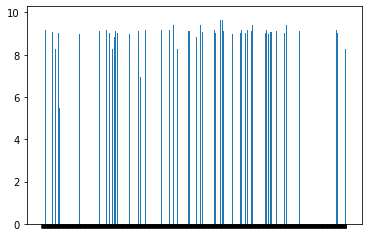

In [482]:
ordenado = details_ratings.sort_values("room_facilities")
plt.bar(ordenado['room_facilities'], ordenado['mean'])
ax=plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show()

### Levando em consideração que as facilidades estão ordenadas e que as notas variam com poucas e muitas facilidades podemos concluir que não existe uma relação de crescimento da nota de acordo com a quantidade de facilidades.

## 7. Relação entre a nota recebida e a localização

<AxesSubplot:xlabel='Localização', ylabel='Total'>

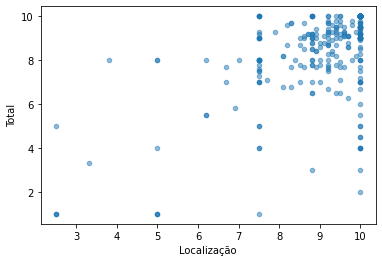

In [483]:
top = details_ratings.groupby(['city_name', 'hotel_name_x']).mean()
top.sort_values("mean", ascending=False)
top.plot.scatter(x='Localização', y="Total", alpha=0.5)

## 8. Sobre a nota dos imóveis

### Em relação ao que foi analisado podemos afirmar que as notas são diretamente influenciadas pela localização do imóvel, mas não pelo que está descrito nas facilidades ou características do mesmo.

## 9. Anúncios críticos e por que?

### Não encontrei nenhum anúncio crítico.

## 10. Outras análises

### Poderiam ser feitas análises em relação a epoca do ano para cada localização ou tempo de alta estação, em outra área poderiamos também analisar tambem sobre margens de lucro, da parte logística de como é feita a rota ou acessibilidade por preço de passagem.

## 11. Como você projetaria um dashboard para mostrar essas informações?

### As informações no Dash poderia conter o máximo e mínimo encontrado, assim como pelo menos 3 gráficos dinâmicos, o terceiro poderia ser sobre tamanho de área do imóvel em relação a nota ou sobre proximidade do atrativo da região com a média das notas.

## 12. Quais outras informações/dados você relacionaria com essas bases, caso tivesse acesso?

### Além de analisar lucro, logística de ida ou também para a atratividade, também analisaria o custo benefício de cada empreendimento, sua localização, custo do metro, custo de investimento e retorno por tempo.

## 13. (Extra) Com base nesses dados e nos anúncios fornecidos, como você melhoraria as notas?


### Para melhorar as notas acredito que teria que fazer mais levantamento de dados procurando por mais parametros relevantes a nota.